In [1]:
from  load_data import *
from process_ir_data import *

# Load Raw Data

In [2]:
# Instantiate class
Data()

# Load data to dataframe
ir_data = Data.read()

# Visualise the data
#Data.plot(ir_data)

#ir_data

# Find the Peaks in the Raw Data

In [3]:
# Instantiate class - doesn't work as Peaks(ir_data), I have to use Peaks = Peaks(ir_data), why?
Peaks = Peaks(ir_data)

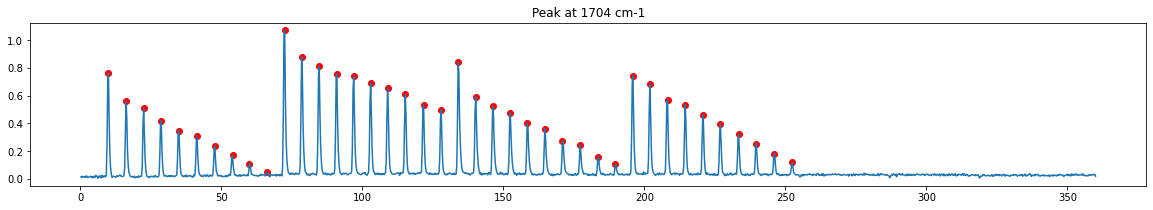

In [4]:
# Determine the peak prominences of every wavelength
#processed_ir_data = Peaks.prominence_all(0.032)

# Determine the peak prominences of a single wavelength
#processed_ir_data = Peaks.prominence(0.032,'Peak at 1704 cm-1')

# Determine the peak heights of a single wavelength - TO TEST
processed_ir_data = Peaks.height(0.0505,'Peak at 1704 cm-1')

# Determine the experimental areas of each peak - must be only one wavelength
#processed_ir_data = Peaks.exp_area(0.032, 4, 'Peak at 1704 cm-1')

# Determine the experimental areas of each peak - must be only one wavelength
#processed_ir_data = Peaks.fitted_area(0.032, 4, 'Peak at 1704 cm-1')

# Fit a gaussian to a single peak and determine it's area - must be only one wavelength
#processed_ir_data= Peaks.fitted_area_sp(0.05, 4, 'Peak at 1704 cm-1', 0)

# Visualise which peaks have been picked - single peak
Peaks.plot(processed_ir_data, 'Peak at 1704 cm-1')

#processed_ir_data

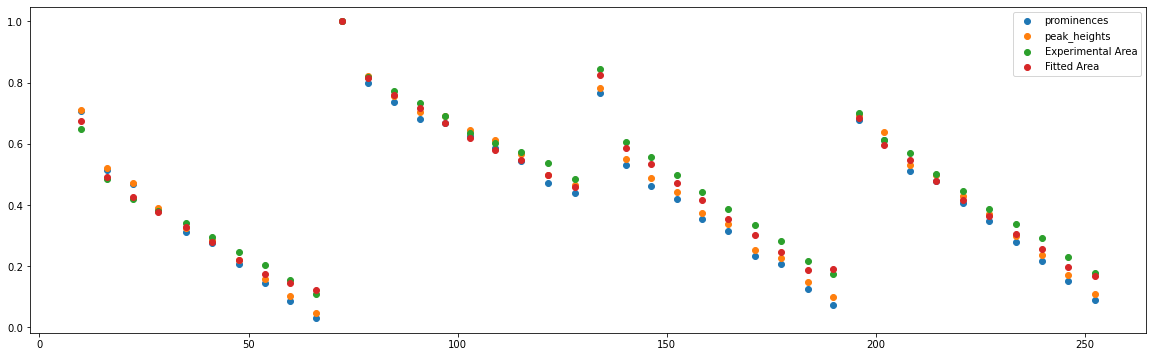

In [47]:
# Add this as def compare
prominence = Peaks.prominence(0.032,'Peak at 1704 cm-1')
height = Peaks.height(0.0505,'Peak at 1704 cm-1').iloc[:,1]
exp_area = Peaks.exp_area(0.032, 4, 'Peak at 1704 cm-1').iloc[:,1]
fitted_area = Peaks.fitted_area(0.032, 4, 'Peak at 1704 cm-1').iloc[:,1]
tmp = [prominence,height,exp_area,fitted_area]
compare = pd.concat(tmp, axis=1)

df =[]
for var in range(1,len(compare.columns)):
    tmp = compare.iloc[:,var]/max(compare.iloc[:,var])
    df.append(tmp)
thing = pd.concat(df, axis=1)

# Plot all picked peaks
fig = plt.figure(figsize=(20,6))
for var in range(0,4):
    plt.scatter(compare['Relative Time'], thing.iloc[:,var], label = thing.columns[var])
    plt.legend()